In [1]:
from piper.defaults import *
import seaborn as sns
sns.set_style("darkgrid")

piper v0.1.2: Friday, 09 April 2021 18:48:37


In [2]:
csv = 'inputs/2018 Bestsellers.csv'

renamed_cols = {
    'ï»¿title': 'title',
    'previous_rank': 'prev_rank',
    'weeks_on_list': 'weeks_listed'
}

In [3]:
%%piper

df <- pd.read_csv(csv, parse_dates=['Week'])
>> rename(columns=renamed_cols)
>> clean_names()
>> head()

1300 rows, 9 columns


In [4]:
# count(df, 'author')

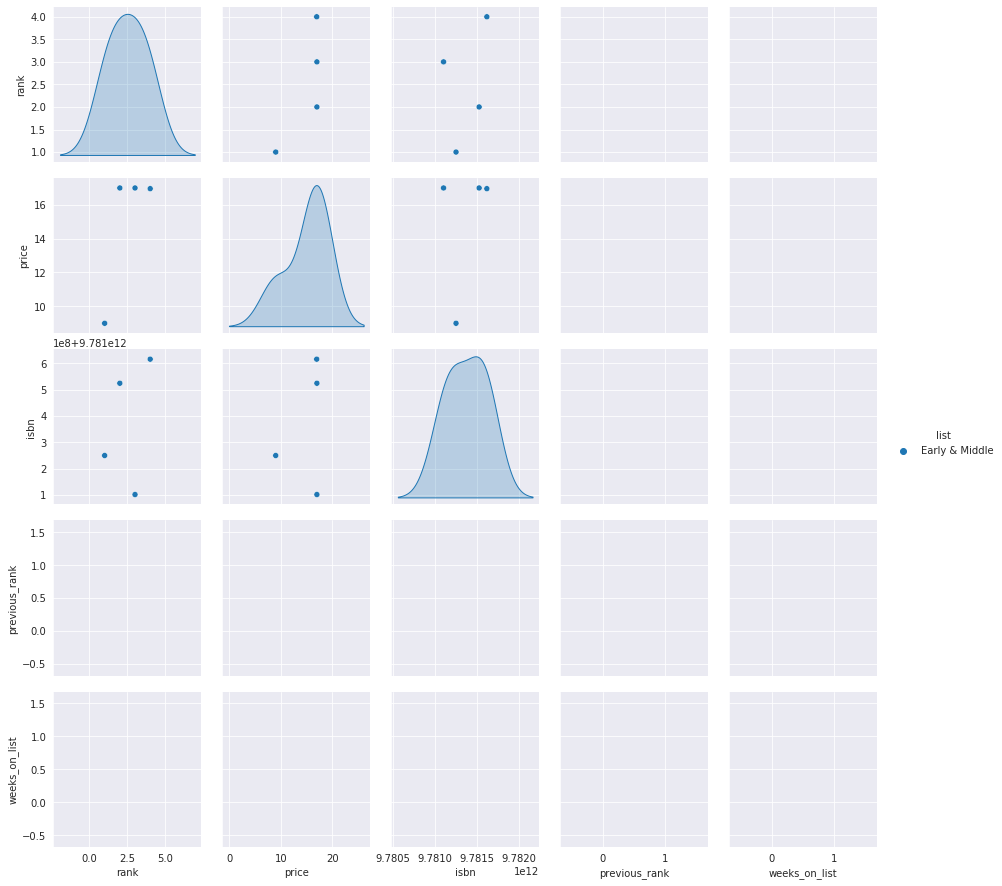

In [5]:
sns.pairplot(df, hue='list');

In [6]:
count(df, 
       ['author', 'title', 'list'], 
       percent=True, 
       threshold=80)

3 rows, 3 columns


,,,n,%,cum %
author,title,list,,,
Kelly Barnhill,The Girl Who Drank the Moon,Early & Middle,1,25.0,25.0
Madeleine L'Engle,A Wrinkle in Time,Early & Middle,1,25.0,50.0
R.J. Palacio,Auggie & Me,Early & Middle,1,25.0,75.0


In [7]:
count(df, 'week')

1 rows, 3 columns


,n,%,cum %
week,,,
2018-02-14,4,100.0,100.0


In [8]:
df_counts = count(df, ['list', 'price'], sort_values=None, reset_index=True)
display(head(df_counts))

3 rows, 5 columns


3 rows, 5 columns


,list,price,n,%,cum %
0,Early & Middle,8.99,1,25.0,25.0
1,Early & Middle,16.95,1,25.0,50.0
2,Early & Middle,16.99,2,50.0,100.0


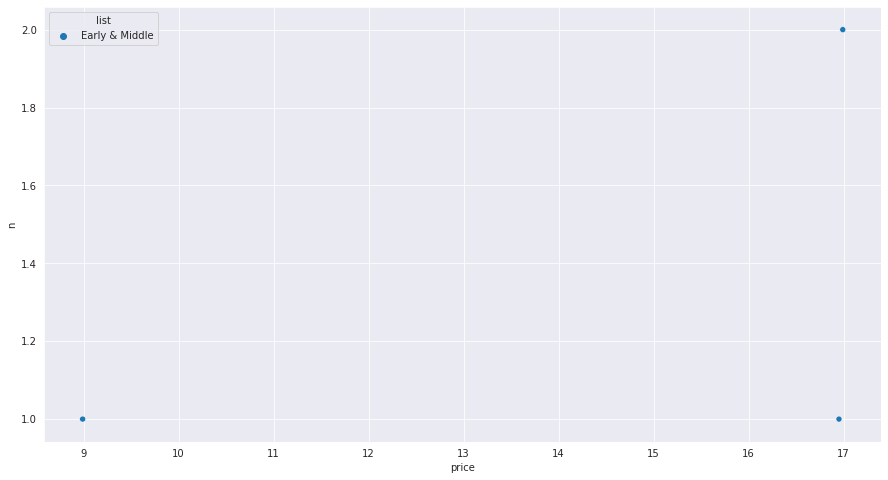

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df_counts, y='n', x='price', hue='list');

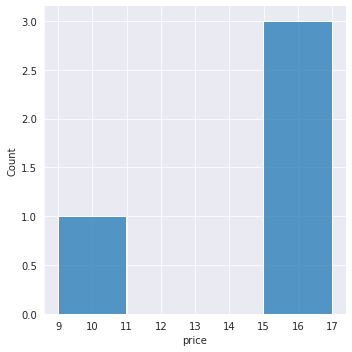

In [10]:
sns.displot(df['price']);